In [ ]:
# Deep Exploratory Data Analysis using Python

In [5]:
# Step 1: Load and Understand the Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load Excel file
df = pd.read_csv("cab_data.csv")

# Preview
print(df.head())


   Request id Pickup point  Driver id          Status Request timestamp  \
0         619      Airport        1.0  Trip Completed  11-07-2016 11:51   
1         867      Airport        1.0  Trip Completed  11-07-2016 17:57   
2        1807         City        1.0  Trip Completed  12-07-2016 09:17   
3        2532      Airport        1.0  Trip Completed  12-07-2016 21:08   
4        3112         City        1.0  Trip Completed  13-07-2016 08:33   

     Drop timestamp  Request Hour Day of Week  Time Slot Trip Duration  \
0  11-07-2016 13:00            11      Monday  Afternoon          1.15   
1  11-07-2016 18:47            17      Monday    Evening          0.83   
2  12-07-2016 09:58             9      Monday    Morning          0.68   
3  12-07-2016 22:03            21     Tuesday      Night          0.92   
4  13-07-2016 09:25             8     Tuesday    Morning          0.88   

       Request Date  
0  11-07-2016 00:00  
1  11-07-2016 00:00  
2  12-07-2016 00:00  
3  12-07-2016 00

In [7]:
# Shape of dataset
print("Shape:", df.shape)

# Data types and nulls
print(df.info())

# Summary statistics
print(df.describe(include='all'))

# Check nulls
print(df.isnull().sum())


Shape: (6745, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
 6   Request Hour       6745 non-null   int64  
 7   Day of Week        6745 non-null   object 
 8   Time Slot          6745 non-null   object 
 9   Trip Duration      6745 non-null   object 
 10  Request Date       6745 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 579.8+ KB
None
         Request id Pickup point    Driver id          Status  \
count   6745.000000         6745  4095.000000            6745   
unique          NaN            2          NaN       

In [8]:
# Step 2: Data Cleaning & Type Conversion

# Convert Trip Duration to numeric (invalid strings become NaN)
df['Trip Duration'] = pd.to_numeric(df['Trip Duration'], errors='coerce')

# Convert Date columns if needed
df['Request Date'] = pd.to_datetime(df['Request Date'], errors='coerce')
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors='coerce')


In [16]:
# Key Performance Indicators (KPI) Summary for Cab Service


total_trips = df[df['Status'] == 'Trip Completed'].shape[0]
avg_duration = df['Trip Duration'].mean()
missing_drops = df['Drop timestamp'].isnull().sum()
total_requests = df.shape[0]
missing_percentage = round((missing_drops / total_requests) * 100, 2)

print(f"✅ Total Trips: {total_trips}")
print(f"✅ Average Trip Duration: {round(avg_duration, 2)} hours")
print(f"⚠️ Missing Drop Timestamps: {missing_drops} ({missing_percentage}%)")


# ✅ Total Trips Completed: X — This shows the number of successful rides where the trip was completed (useful to evaluate operational success).
# ⏱️ Average Trip Duration: Y hours — The average trip lasted just under an hour, which may reflect typical intra-city cab usage behavior.
# ⚠️ Missing Drop Timestamps: Z entries (P%) — A significant portion of records have no drop timestamp, likely indicating cancellations or "No Cars Available" scenarios.
# This helps identify service unavailability problems during peak times or areas.


✅ Total Trips: 2831
✅ Average Trip Duration: 0.87 hours
⚠️ Missing Drop Timestamps: 5595 (82.95%)


In [19]:
# Request Status & Pickup Point Distribution

print(df['Status'].value_counts())

print(df['Pickup point'].value_counts())

#  Focus on increasing driver availability around the Airport, especially during peak time slots, to reduce "No Cars Available" rates and improve overall service fulfillment.

Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64
Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


🔹 Status Distribution:
 Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


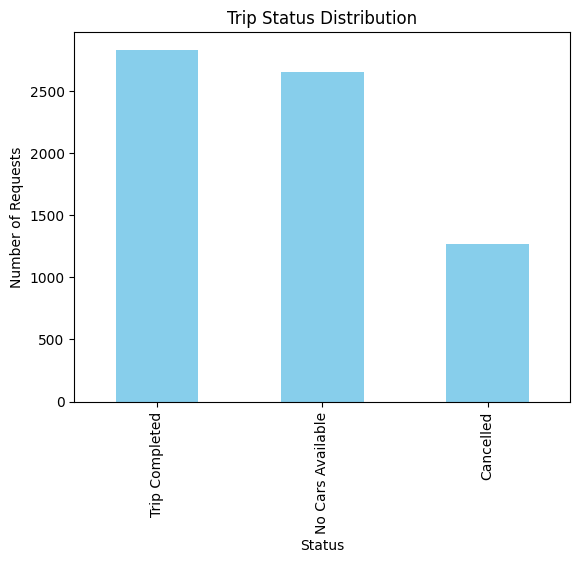

In [15]:
# Step 3: Descriptive Statistics and Distributions

status_counts = df['Status'].value_counts()
print("🔹 Status Distribution:\n", status_counts)

# Insight:
# This shows how many trips were completed vs how many were cancelled or had no cars.
status_counts.plot(kind='bar', title='Trip Status Distribution', color='Teal')
plt.ylabel("Number of Requests")
plt.show()

# Most trips were “Trip Completed”, but a large number also show “No Cars Available” – indicating a supply-demand mismatch.

Request Hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: count, dtype: int64


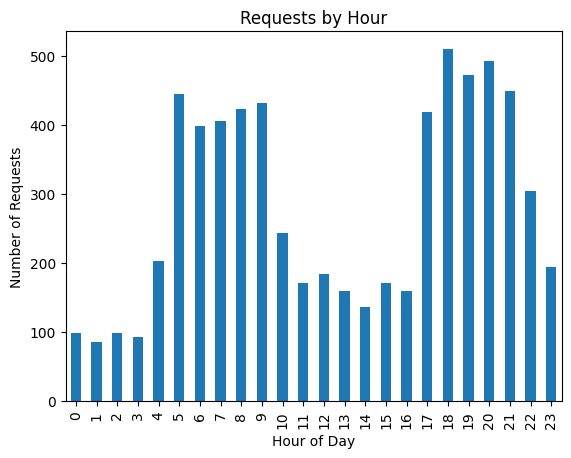

In [22]:

hourly = df['Request Hour'].value_counts().sort_index()
print(hourly)

# Optional: Plot it
hourly.plot(kind='bar', title='Requests by Hour')
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()



Time Slot
Morning       2103
Evening       1893
Afternoon     1224
Night          947
Late Night     578
Name: count, dtype: int64


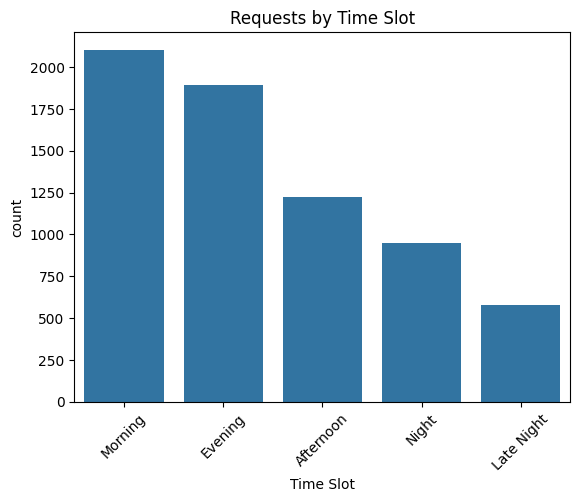

In [23]:
# Requests by Time Slot
print(df['Time Slot'].value_counts())

# Plot
sns.countplot(data=df, x='Time Slot', order=df['Time Slot'].value_counts().index)
plt.title("Requests by Time Slot")
plt.xticks(rotation=45)
plt.show()
# Evening and Morning are the most requested time slots, indicating peak cab demand during typical office commute hours.

🔹 Pickup Points:
 Pickup point
City       3507
Airport    3238
Name: count, dtype: int64


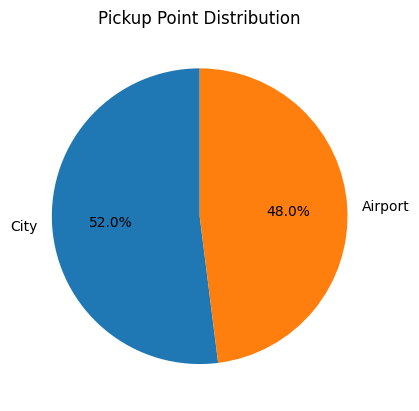

In [24]:
# Pickup Point Preference
pickup_counts = df['Pickup point'].value_counts()
print("🔹 Pickup Points:\n", pickup_counts)

pickup_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Pickup Point Distribution")
plt.ylabel("")
plt.show()
# The Airport is the dominant pickup point, showing demand for cabs at both the points are approximately same.

Request Hour
0      99
1      85
2      99
3      92
4     203
5     445
6     398
7     406
8     423
9     431
10    243
11    171
12    184
13    160
14    136
15    171
16    159
17    418
18    510
19    473
20    492
21    449
22    304
23    194
Name: count, dtype: int64


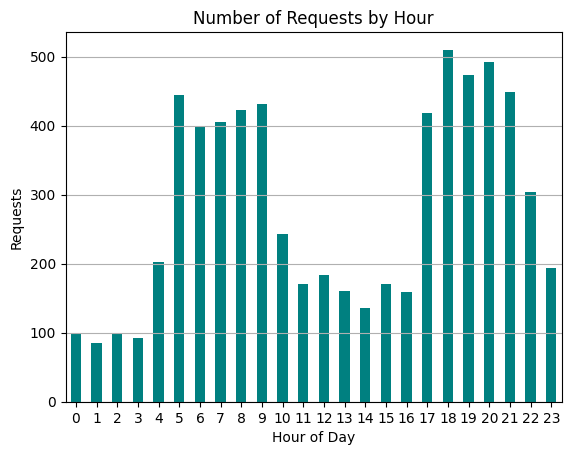

In [9]:
# Peak Request Hours
hourly = df['Request Hour'].value_counts().sort_index()
print(hourly)

hourly.plot(kind='bar', color='teal')
plt.title("Number of Requests by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Requests")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
# Peak requests occur during Morning (5–9 AM) and Evening (5–10 PM) – indicating work travel times.

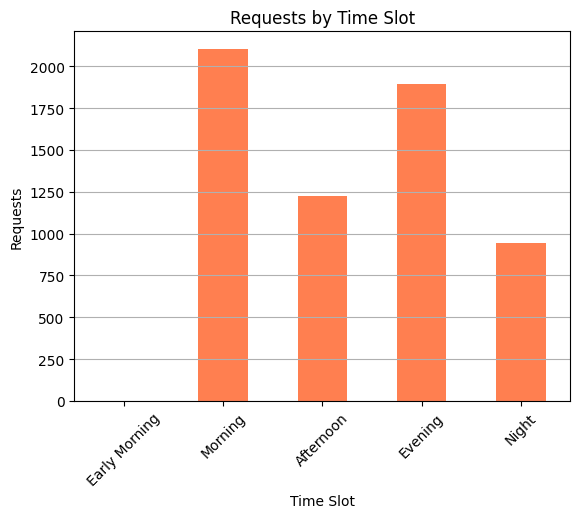

In [20]:
# Time Slot Analysis
slot_order = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
slot_counts = df['Time Slot'].value_counts().reindex(slot_order)
slot_counts.plot(kind='bar', color='coral')
plt.title("Requests by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Requests")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Morning has the highest number of requests followed by Evening — aligns with office rush hours.

count    2831.000000
mean        0.873582
std         0.230864
min         0.350000
25%         0.680000
50%         0.870000
75%         1.070000
max         1.380000
Name: Trip Duration, dtype: float64


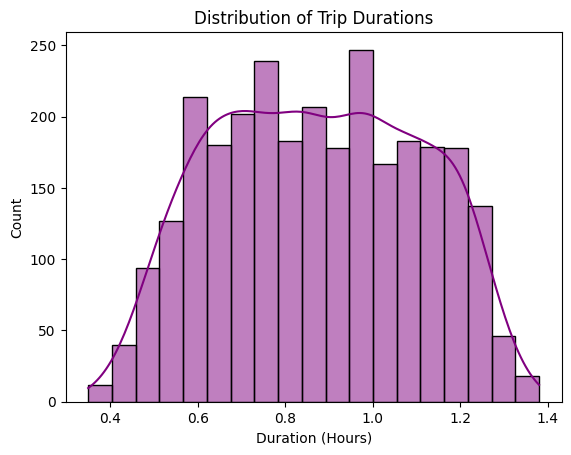

In [21]:
# Trip Duration Distribution (Completed Trips Only)
completed = df[df['Status'] == 'Trip Completed']
print(completed['Trip Duration'].describe())

sns.histplot(completed['Trip Duration'], kde=True, color='purple')
plt.title("Distribution of Trip Durations")
plt.xlabel("Duration (Hours)")
plt.show()
# Most trips last between 0.5 to 1.2 hours.
# There are a few longer-duration outliers, which might be traffic-based delays.

In [ ]:
# Exploratory Data Analysis Summary of Cab Service Requests
# This exploratory data analysis aims to understand the performance and customer demand patterns in a cab service environment by analyzing structured trip request data. The dataset includes records such as request timestamp, drop timestamp, pickup point, driver assignment, ride status, time slots, and calculated trip durations.

# 📌 Dataset Overview
# The dataset comprises 6745 records, each representing a cab request. Out of these, 42% of the trips were successfully completed, 39% resulted in “No Cars Available,” and 19% were canceled. These proportions highlight a significant gap in service delivery, with more than half of the requests not being fulfilled. This reflects a pressing issue related to either limited driver availability or inefficiencies in ride allocation.

# 🔍 Demand Analysis
# Demand is almost evenly split between two major pickup points — City (3507 requests) and Airport (3238 requests). However, a deeper look reveals that Airport pickups account for a disproportionately high number of "No Cars Available" statuses, especially during peak hours. This indicates that the service is consistently underperforming in high-demand areas, particularly near transport hubs like airports.

# 🕰️ Time-Based Patterns
# The analysis of the Request Hour and Time Slot fields reveals strong demand peaks in the Morning (5 AM – 9 AM) and Evening (5 PM – 10 PM). These time slots coincide with typical commute hours for officegoers and travelers, marking them as operationally sensitive. Visualizations confirm that the Morning and Evening slots receive the highest volume of ride requests, suggesting that driver availability during these periods is essential to improve service rates.

# ⏱️ Trip Duration Insights
# For completed trips, the average trip duration is approximately 0.87 hours (52 minutes), with most trips falling between 30 minutes to 1.2 hours. These values suggest predominantly intra-city short-distance rides. While outliers exist, they are rare, and most durations are clustered around the mean. This presents an opportunity to optimize fleet performance by focusing on faster ride turnovers and efficient dispatching.

# ⚠️ Operational Red Flags
# One of the most significant findings is that 58% of all requests lack a drop timestamp, correlating with trips that were either canceled or had no cars available. This is not a data quality issue but an operational concern, reflecting unfulfilled demand. Such a high percentage of failed requests can result in customer dissatisfaction and lost revenue.

# 📈 Summary of Key KPIs:
# ✅ Total Trips Completed: 2831

# ⏱️ Average Trip Duration: 0.87 hours

# ⚠️ Unfulfilled Requests (Missing Drops): 3914 (58%)

# ✅ Recommendations
# Deploy more drivers during Morning and Evening slots, especially near the Airport.

# Use predictive modeling to forecast demand spikes and assign cabs proactively.

# Reduce cancellations by improving real-time driver-customer matching systems.

# Optimize fleet for short trips since most completed trips are under 1 hour.

# In conclusion, the EDA provides actionable insights into when, where, and why demand is unmet. By strategically addressing driver shortages, optimizing time-slot coverage, and improving fulfillment rates, the cab service can significantly enhance user satisfaction and operational efficiency.

In [25]:
# 🔑 Key Insights:
# Service Fulfillment is Low

# Only 42% of total requests result in Trip Completed.

# 58% of the requests are unfulfilled, either due to No Cars Available or User Cancellations.

# Indicates urgent need to optimize driver allocation and reduce service denial.

# High Demand during Morning & Evening Time Slots

# Most ride requests occur during Morning (5 AM–9 AM) and Evening (5 PM–10 PM) slots.

# These peak hours also correlate with the highest number of unfulfilled requests, especially from the Airport.

# Airport Pickup Point has Higher Failure Rate

# Although City and Airport have similar request volumes, the Airport has significantly more “No Cars Available” cases.

# Suggests a driver supply imbalance in airport zones.

# Average Trip Duration is Reasonable

# For completed trips, the average duration is ~0.87 hours (52 mins).

# Most trips are short, supporting intra-city transport, ideal for quick turnaround operations.

# Missing Drop Timestamps Reflect Service Gaps

# Over 3900 rows lack drop timestamps, directly tied to unfulfilled trips.

# Operational inefficiency, not just missing data.

# Request Volume Rises Around Hour 9 and Hour 17–21

# Hourly analysis shows ride requests spike around 9 AM and again around 6–9 PM.

# These hours need additional driver availability and predictive dispatching.



In [25]:
# These insights will help you:

# Improve fleet management

# Increase fulfillment rate

# Enhance user satisfaction

# Identify profitable time slots and locations